## Introduction

The K-Nearest Neighbors (KNN) algorithm is a simple, supervised machine learning method used for classification and regression tasks. Here’s a quick overview of how it works:

Training Data:
- KNN uses a dataset where the outcome (label) is already known.
- Distance Calculation: For a new data point, KNN calculates the distance between this point and all points in the training dataset. The most common distance metric used is Euclidean distance. Sometimes, we can use a different distance, such as, a generalized Minkowski distance:$$ d_p(x,y)=\Big (\sum_{i}^{n}|x_i-y_i|^p\Big)^{\frac{1}{p}}\text{, where } p\geq 1.$$
- Finding Neighbors: It identifies the ‘K’ closest data points (neighbors) to the new data point.
- Majority Vote (for Classification): For classification tasks, the algorithm assigns the new data point to the class that is most common among its K nearest neighbors.
- Average (for Regression): For regression tasks, the algorithm assigns the new data point a value based on the average of the values of its K nearest neighbors. We can do it in two ways: just doing an uniform mean, or weighting with distance.

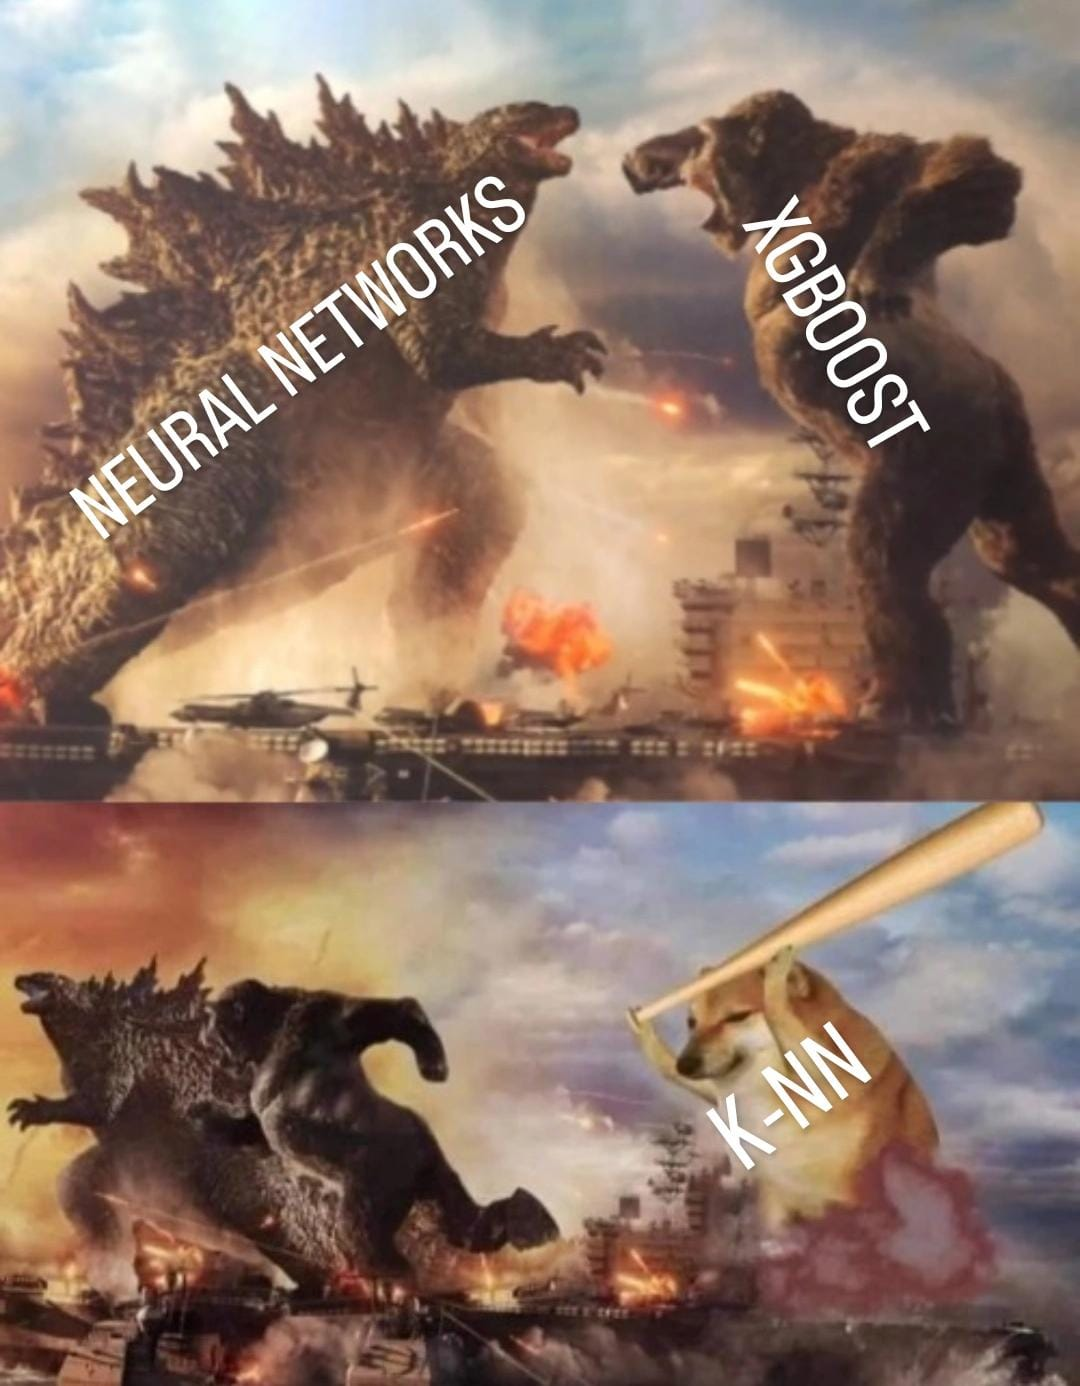

Let's show code here!

In [1]:
#here we import first libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
#we define here Minkowski distance
def Minkoski(x,y,p):
    k=np.abs(x-y)
    d=(np.sum(k**p))**(1/p)
    return d

In [3]:

#we define here Minkowski distance
def Minkoski(x,y,p):
    k=np.abs(x-y)
    d=(np.sum(k**p))**(1/p)
    return d
class KNN:
    
    def __init__(self,n_neighbors=5,p=2,task='classification',mean='uniform'):
        #let's initialize parameters. We will focus neighbors at 5, task at classification and (for regression)
        #mean at uniform
        self.k=n_neighbors
        self.p=p
        self.task=task
        self.mean=mean
        
    
    def fit(self,X,y):
        self.X=X
        self.y=y
    
    def predict(self,X):
        prediction=[]
        for row in X:
            distance=[]
            for i in range(len(self.X)):
                dist=Minkoski(row,self.X[i],self.p)
                #let's compute Minkowski distance for each row
                distance.append([dist,self.y[i]])
            
            
            distance=np.array(distance)
            #let's modify distance as numpy array
            sorted_indices=np.argsort(distance[:,0])[:self.k] 
            #let's compute indices for k nearest neighbors
            label=distance[sorted_indices,1]
            #let's compute distance
            weights=1/(distance[sorted_indices,0]+1e-5)
            #let's compute weights with 1e-5 to avoid division by zero
            
            if self.task=='classification': 
                label,counts=np.unique(label, return_counts=True)
                #let's compute most commons label and counts them
                label=label[np.argmax(counts)] #if our task is classification let's compute most common labels 
                #of k nearest neighbors
            elif self.task=='regression':
                #label=np.mean(label,axis=0)
                if self.mean=='uniform':
                    label=np.mean(label,axis=0) #if our task with is regression let's compute mean, depending if it's 
                    #uniform or not.
                elif self.mean=='weighted':
                    label=np.sum(weights*label)/np.sum(weights)
                
            prediction.append(label)
            

        return np.array(prediction)

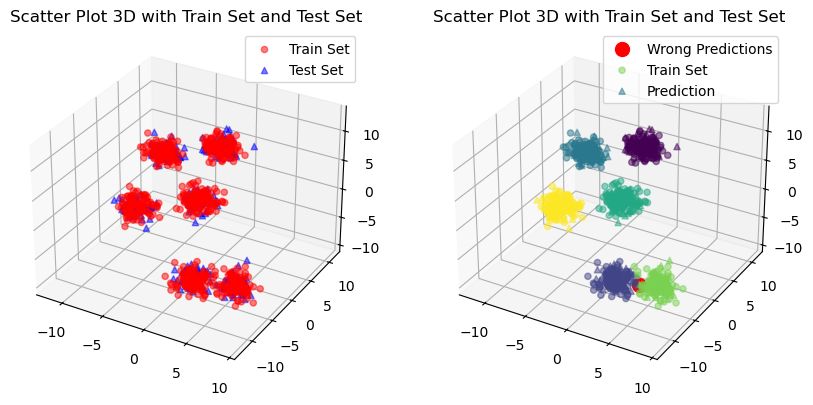

In [4]:

X, y = make_blobs(n_samples=1000, centers=6, n_features=3, random_state=42)

# We separate data between train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


#let's initialize model. We will use euclidean distance, and n neighbors.
model = KNN()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)


errors = np.where(y_test != y_pred)[0]
#we check here where we made wrong prediction



# let's create a 3d figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1, projection='3d')

#scatter plot for train set
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='red', marker='o', alpha=0.5, label='Train Set')

#scatter plot for test set
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c='blue', marker='^', alpha=0.5, label='Test Set')

ax.set_title('Scatter Plot 3D with Train Set and Test Set')
ax.legend()

ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(X_test[errors, 0], X_test[errors, 1], X_test[errors, 2], c='red', marker='o',s=100,label='Wrong Predictions')

ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, marker='o', alpha=0.5, label='Train Set')

ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, marker='^', alpha=0.5, label='Prediction')



ax.set_title('Scatter Plot 3D with Train Set and Test Set')
ax.legend()

plt.show()

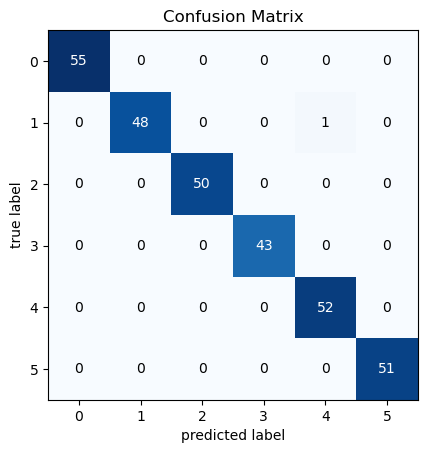

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      0.98      0.99        49
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        43
           4       0.98      1.00      0.99        52
           5       1.00      1.00      1.00        51

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [5]:
conf_matrix=confusion_matrix(y_test, y_pred) #here we see confusion matrix. We made only a wrong one.

plot_confusion_matrix(conf_matrix, show_absolute=True, show_normed=False)

plt.title('Confusion Matrix')

plt.show()

print(classification_report(y_test, y_pred)) #let's check analysis

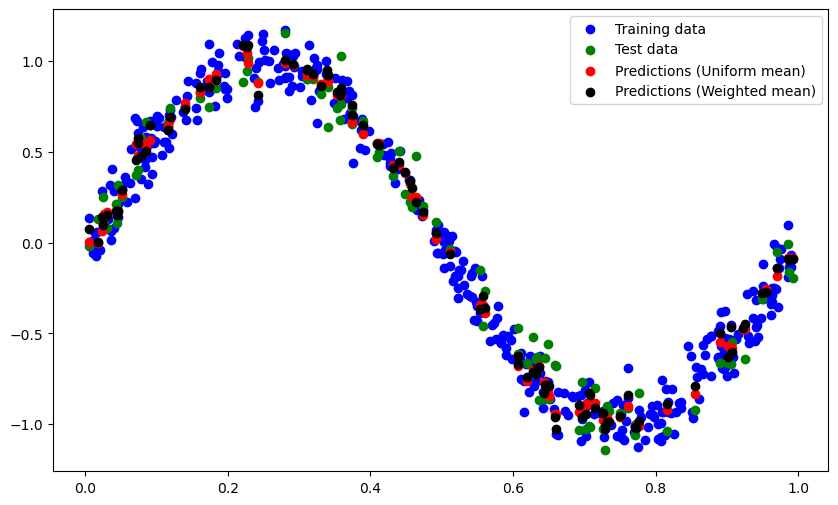

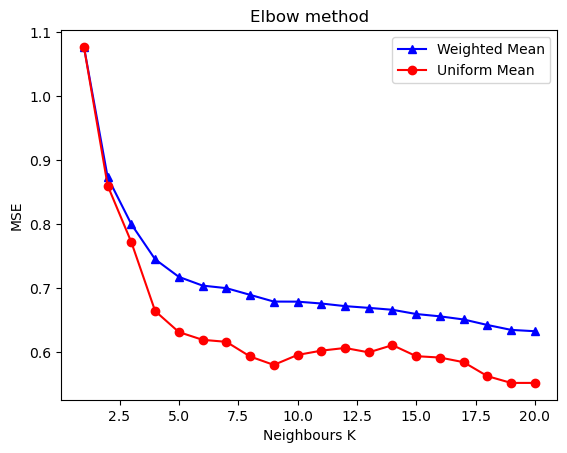

In [6]:

#Here we make just a simple test for regression
   
np.random.seed(42)
X = np.random.rand(500, 1)  
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(500) * 0.1  # noisy sine wave

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNN(task='regression')
knn.fit(X_train, y_train)

predictions=knn.predict(X_test)

knn = KNN(task='regression',mean='weighted')
knn.fit(X_train, y_train)

predictions2=knn.predict(X_test)

fig = plt.figure(figsize=(10,6))

plt.scatter(X_train, y_train, label="Training data", color="blue")
plt.scatter(X_test, y_test, label="Test data", color="green")
plt.scatter(X_test, predictions, label="Predictions (Uniform mean)", color="red")
plt.scatter(X_test, predictions2, label="Predictions (Weighted mean)", color="black")

plt.legend()
plt.show()    
plt.show()

max_k=20

mse_u=np.random.rand(max_k,1)

mse_w=np.random.rand(max_k,1)

for k in range(0,max_k):
    knn = KNN(n_neighbors=(k+1),task='regression',mean='uniform')
    knn.fit(X_train, y_train)
    predictions_u=knn.predict(X_test)
    
    mse_u[k]=1/2*np.sum((predictions_u-y_test)**2)
    
    knn = KNN(n_neighbors=(k+1),task='regression',mean='weighted')
    knn.fit(X_train, y_train)
    predictions_w=knn.predict(X_test)
    
    mse_w[k]=1/2*np.sum((predictions_w-y_test)**2)
      
plt.plot(range(1,len(mse_w)+1),mse_w, marker='^', linestyle='-', color='b', label='Weighted Mean')

plt.plot(range(1,len(mse_u)+1),mse_u, marker='o', linestyle='-', color='r', label='Uniform Mean')


plt.xlabel('Neighbours K')
plt.ylabel('MSE')
plt.title('Elbow method')
plt.legend()